### Exotic options 
- Pricing exotic options with Monte Carlo simulation

In [5]:
import numpy as np 
nsim = 10              # Number of simulations
nstep = 5 

e = np.random.normal(loc=0.0, scale=1.0, size=(nsim,nstep))
print(e)


[[-0.23092302  0.5168684  -1.25300056 -1.0296965   0.52985031]
 [ 2.1590161   1.84813331  0.47959397  1.04026272  0.5239105 ]
 [-0.08006935  1.28938793 -1.1412429  -2.15144928 -1.11711791]
 [ 1.02278604  1.47548657  1.59930464 -1.95491652 -0.24393537]
 [-0.51120549  0.43998625  0.07196378 -2.1161996   1.25468798]
 [ 0.00594246  2.11986142  1.63214177 -1.26053785 -0.09499487]
 [ 1.07705949  0.18485347  0.76766554  0.13468859 -1.33580641]
 [ 0.87771651  1.66423185  0.7092983   0.43991224 -0.40628246]
 [-2.05527956  0.97513235  2.57113357 -1.5410734   0.19919229]
 [-1.08915985 -0.035454    0.47099354  1.16674875 -1.85013018]]


- Step1 : simulating multiple stock price paths using the Geometric Brownian Motion (GBM) mode

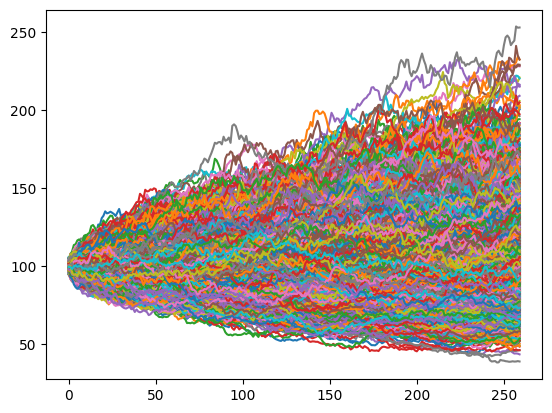

In [6]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(5)
nsim = 5000              # Number of simulations
nstep = 260              # Trading days in a year
T = 1                    # Time horizon
dt = T/nstep            # Time step
r = 0.05                # Risk-free rate
sigma = 0.25            # Volatility
S_0 = 100               # Initial stock price

# Generate random paths
e = np.random.normal(loc=0.0, scale=1.0, size=(nsim,nstep))
S_t = S_0*np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * e).cumprod(axis=1)
plt.plot(S_t.T)
plt.show()


- Step 2: compute terminal payoffs and prices for European options

In [15]:
K = 100
S_T = S_t[:,nstep-1]

# European Call
C_T = np.fmax(S_T - K,0)
C_0 = np.exp(-r*T) * np.mean(C_T)
print('European call terminal price (Monte Carlo), with num of paths ')
print(C_T, " -->  " , C_T.size , " paths "  )

print('European call price (Monte Carlo)')
print(round(C_0,2))

# European Put
P_T = np.fmax(K - S_T,0)
P_0 = np.exp(-r*T) * np.mean(P_T)
print('European put terminal price (Monte Carlo), with num of paths ')
print(P_T, " -->  " , P_T.size , " paths "  )

print('European put price (Monte Carlo)')
print(round(P_0,2))

European call terminal price (Monte Carlo), with num of paths 
[ 8.0859333 10.8495274  0.        ...  0.        23.2300064  0.       ]  -->   5000  paths 
European call price (Monte Carlo)
12.4
European put terminal price (Monte Carlo), with num of paths 
[ 0.          0.         12.05069277 ...  1.77305191  0.
  7.28972494]  -->   5000  paths 
European put price (Monte Carlo)
7.39


- Step 3: Compute path averages and prices for Asian options
Here's the markdown formula representation for different types of Asian options:

### Asian Average-Price Options

**Asian Average-Price Call:**
$AC_0 = e^{-rT}E[\max(\bar{S} - K, 0)]$
where $\bar{S} = \frac{1}{n}\sum_{i=1}^{n}S_i$

**Asian Average-Price Put:**
$AP_0 = e^{-rT}E[\max(K - \bar{S}, 0)]$
where $\bar{S} = \frac{1}{n}\sum_{i=1}^{n}S_i$

### Asian Average-Strike Options

**Asian Average-Strike Call:**
$ASC_0 = e^{-rT}E[\max(S_T - \bar{S}, 0)]$
where $\bar{S} = \frac{1}{n}\sum_{i=1}^{n}S_i$

**Asian Average-Strike Put:**
$ASP_0 = e^{-rT}E[\max(\bar{S} - S_T, 0)]$
where $\bar{S} = \frac{1}{n}\sum_{i=1}^{n}S_i$

Where:
- $\bar{S}$ is the arithmetic average of stock prices over the period
- $S_T$ is the final stock price
- $K$ is the strike price
- $r$ is the risk-free rate
- $T$ is time to maturity
- $n$ is number of observations
- $E[.]$ denotes expected value

These options are also known as average options, and their payoffs depend on the average price of the underlying asset over some period of time.

In [16]:
# Asian average-price call
S_avg = S_t.mean(axis=1)
AC_T = np.fmax(S_avg - K,0)
AC_0 = np.exp(-r*T) * np.mean(AC_T)
print('Asian average-price call price (Monte Carlo)')
print(round(AC_0,2))

# Asian average-price put
AP_T = np.fmax(K - S_avg,0)
AP_0 = np.exp(-r*T) * np.mean(AP_T)
print('Asian average-price put price (Monte Carlo)')
print(round(AP_0,2))

# Asian average-strike call
ASC_T = np.fmax(S_T - S_avg,0)
ASC_0 = np.exp(-r*T) * np.mean(ASC_T)
print('Asian average-strike call price (Monte Carlo)')
print(round(ASC_0,2))

# Asian average-strike put
ASP_T = np.fmax(S_avg - S_T,0)
ASP_0 = np.exp(-r*T) * np.mean(ASP_T)
print('Asian average-strike put price (Monte Carlo)')
print(round(ASP_0,2))

Asian average-price call price (Monte Carlo)
6.93
Asian average-price put price (Monte Carlo)
4.33
Asian average-strike call price (Monte Carlo)
6.97
Asian average-strike put price (Monte Carlo)
4.56


- Step 4: Compute path maximums and minimums for pricing lookback options
    - calculating prices for two types of lookback options using Monte Carlo simulation:

##### Floating Strike Lookback call


In [17]:
S_max = S_t.max(axis=1)
S_min = S_t.min(axis=1)

FSLC_T = np.fmax(S_T - S_min,0)
FSLC_0 = np.exp(-r*T) * np.mean(FSLC_T)
print('Floating-strike lookback call price (Monte Carlo)')
print(round(FSLC_0,2))


Floating-strike lookback call price (Monte Carlo)
19.84


##### Floating Strike Lookback put

In [19]:
# Floating Strike Lookback put
S_max = S_t.max(axis=1)  # Maximum price along each path
FSLP_T = np.fmax(S_max - S_T, 0)  # Payoff: max(Maximum price - Final price, 0)
FSLP_0 = np.exp(-r*T) * np.mean(FSLP_T)
print('Floating-strike lookback put price (Monte Carlo)')
print(round(FSLP_0,2))

Floating-strike lookback put price (Monte Carlo)
17.72


##### Lookback price put

In [18]:
LBP_T = np.fmax(K-S_min,0)
LBP_0 = np.exp(-r*T) * np.mean(LBP_T)
print('Lookback price put price (Monte Carlo)')
print(round(LBP_0,2))

Lookback price put price (Monte Carlo)
14.86


##### Lookback price call


In [21]:
# Lookback price call
LBC_T = np.fmax(S_max - K, 0)  # Payoff: max(Maximum price - Strike, 0)
LBC_0 = np.exp(-r*T) * np.mean(LBC_T)
print('Lookback price call price (Monte Carlo)')
print(round(LBC_0,2))

Lookback price call price (Monte Carlo)
22.76
